In [33]:
# import everything imaginable
import sys
import os
import platform 
import sqlite3
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import option
import utils

In [34]:
# set the current working directory to the desired path (THIS IS ONLY FOR ME) you can change yours to something else
new_working_directory = r'C:\Program Files\SQLiteStudio\LABS'
os.chdir(new_working_directory)

In [35]:
# importing files and libraries for graph
from stock import Stock
from TA import SimpleMovingAverages, RSI, ExponentialMovingAverages
from DCF_model import DiscountedCashFlowModel

In [36]:
opt = option.Option()
# set default settings

# relative path here
opt.data_dir = "./data"
opt.output_dir = os.path.join(opt.data_dir, "daily")
opt.sqlite_db = os.path.join(opt.data_dir, "sqlitedb/Equity.db")

In [37]:
# set the current working directory to the desired path
new_working_directory = r'C:\Program Files\SQLiteStudio\LABS'
os.chdir(new_working_directory)
print(os.getcwd())

C:\Program Files\SQLiteStudio\LABS


In [38]:
# stock selected to analyze is Nvidia
symbol = 'NVDA'
db_connection = sqlite3.connect(opt.sqlite_db)
stock = Stock(opt, db_connection, symbol)

In [39]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2023, 10, 1)

df = stock.get_daily_hist_price(start_date, end_date)
df.head()

,Ticker,AsOfDate,Open,High,Low,Close,Volume,TurnOver,Dividend
Date,,,,,,,,,
2020-01-02,NVDA,2020-01-02,59.460401,59.749298,58.954832,59.749298,23753600.0,0.0,0.0
2020-01-03,NVDA,2020-01-03,58.551368,59.231270,58.302319,58.792946,20538400.0,0.0,0.0
2020-01-06,NVDA,2020-01-06,57.859012,59.091803,57.597510,59.039501,26263600.0,0.0,0.0
2020-01-07,NVDA,2020-01-07,59.323419,60.212525,58.872641,59.754272,31485600.0,0.0,0.0
2020-01-08,NVDA,2020-01-08,59.711935,60.279766,59.310967,59.866348,27710800.0,0.0,0.0


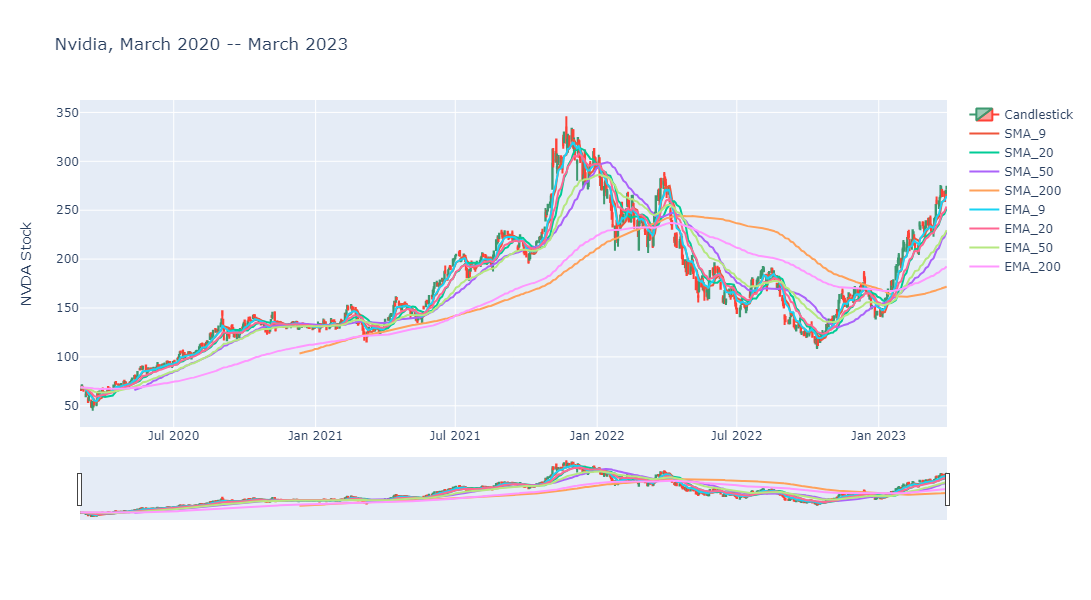

In [40]:
# plot the price graph
import plotly.graph_objects as go
from TA import SimpleMovingAverages, ExponentialMovingAverages

start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2023, 3, 30)

stock.get_daily_hist_price(start_date, end_date)
df = stock.ohlcv_df

# initialize SimpleMovingAverages and ExponentialMovingAverages for the desired periods
periods = [9, 20, 50, 200]
smas = SimpleMovingAverages(df, periods)
# calculate the SMAs
smas.run()

# create a figure and add the candlestick trace
candlestick = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)

fig = go.Figure(data=[candlestick])  # start with the candlestick trace

# plot the SMAs using the 'smas' instance
for period in periods:
    df[f'SMA_{period}'] = smas.get_series(period)
    sma = go.Scatter(x=df.index,
                     y=df[f'SMA_{period}'],
                     yaxis="y1",
                     name=f"SMA_{period}"
                    )
    fig.add_trace(sma)  # add the SMA trace to the figure

periods = [9, 20, 50, 200]
emas = ExponentialMovingAverages(df, periods)
# calculate the EMAs
emas.run()
    
# plot the EMAs using the 'emas' instance
for period in periods:
    df[f'EMA_{period}'] = emas.get_series(period)
    ema = go.Scatter(x=df.index,
                     y=df[f'EMA_{period}'],
                     yaxis="y1",
                     name=f"EMA_{period}"
                    )
    fig.add_trace(ema)  # add the EMA trace to the figure

fig.update_layout(
    width=800, height=600,
    title="Nvidia, March 2020 -- March 2023",
    yaxis_title='NVDA Stock'
)

fig.show()

**Question: Use this notebook to run your DCF model for the stock that you recommend. Plot the stock price of that stock and possibly include a few Moving Averages and/or RSI**

In [41]:
import os
import sqlite3
import datetime
import option
import stock
import DCF_model
import utils
from yahoofinancials import YahooFinancials 
from DCF_model import DiscountedCashFlowModel
from stock import Stock
from utils import MyYahooFinancials
# import files to be used in the DCF model

# set up the options and database connection
opt = option.Option()
opt.sqlite_db = './data/sqlitedb/Equity.db'

# define the stock symbol you want to analyze
symbol = 'NVDA'
# define the analysis date (as_of_date) and DCF model
as_of_date = datetime.date(2023, 10, 1)

# create a Stock instance and load financial data
db_connection = sqlite3.connect(opt.sqlite_db)
stock = Stock(opt, db_connection, symbol, freq = 'annual') # annual frequency
stock.load_financial_data()

model = DiscountedCashFlowModel(stock, as_of_date)

# set the growth rates for the DCF model
eps5y = 0.7870
model.set_FCC_growth_rate(eps5y, eps5y / 2, 0.04)

# calculate the fair value using the DCF model
model_price = model.calc_fair_value()
print(f"DCF price for {symbol} as of {as_of_date} is {model_price}")

Loading financial data for NVDA
DCF price for NVDA as of 2023-10-01 is 822.3657753732888
